In [89]:
import pandas as pd
import numpy as np
import seaborn as snb
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')


In [90]:
# import dataset need for analysis and assign column headers

cols_header = ['Id_number','Refractive_index','Sodium','Magnesium','Aluminum','Silicon','Potassium','Calcium','Barium','Iron','Type_of_glass']



df = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset3/main/glass.csv', names=cols_header)

df

,Id_number,Refractive_index,Sodium,Magnesium,Aluminum,Silicon,Potassium,Calcium,Barium,Iron,Type_of_glass
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...
209,210,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,211,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,212,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,213,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


In [91]:
# Using shape method to confirm number of rows and columns of data available for nanalysis

df.shape

(214, 11)

There is a column with serial number which is not contributing anything to the analysis, so I will drop it


In [92]:

df = df.drop('Id_number', axis = 1,)

# To view the new shape and be sure the column has been dropped 
df.shape

(214, 10)

Dataset has 213 rows i.e records and 11 colums

In [93]:


# To get the datatype and be sure they are good for creating models
df.dtypes


Refractive_index    float64
Sodium              float64
Magnesium           float64
Aluminum            float64
Silicon             float64
Potassium           float64
Calcium             float64
Barium              float64
Iron                float64
Type_of_glass         int64
dtype: object

Observation: features columns are of float values which is good for analysis

In [94]:

# Checking for nulls values, if any
df.isnull().sum()

Refractive_index    0
Sodium              0
Magnesium           0
Aluminum            0
Silicon             0
Potassium           0
Calcium             0
Barium              0
Iron                0
Type_of_glass       0
dtype: int64

There is no null values in any of the columns


In [95]:
# To confirm the column is droped and view the new shape to reflect number of columns
df.shape

(214, 10)

In [96]:
df['Type_of_glass'].value_counts()

2    76
1    70
7    29
3    17
5    13
6     9
Name: Type_of_glass, dtype: int64

Its a binary clasification problem and I will need to convert different values of glass types into appropriate class.
window glass values will be converted to 1, while non window glass values will be converted to 0

In [97]:
df['Type_of_glass'] = np.where(df["Type_of_glass"] < 5, 1, 0)

In [98]:
df.head()

,Refractive_index,Sodium,Magnesium,Aluminum,Silicon,Potassium,Calcium,Barium,Iron,Type_of_glass
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [99]:
# Select best performing features
from sklearn.feature_selection import SelectKBest, f_classif

# Seperate the label from the features
x = df.drop('Type_of_glass', axis=1)

y = df['Type_of_glass']

In [100]:
best_features = SelectKBest(score_func=f_classif,k=9)
fit = best_features.fit(x,y)
df_score = pd.DataFrame(fit.scores_)
df_col = pd.DataFrame(x.columns)

features_score = pd.concat([df_col,df_score], axis=1)

features_score.columns = ['feature_name', 'score']

print(features_score.nlargest(9,'score'))

       feature_name       score
2         Magnesium  286.825789
3          Aluminum  110.831842
7            Barium   79.991350
1            Sodium   54.535265
8              Iron    8.371298
4           Silicon    4.752358
0  Refractive_index    3.895545
5         Potassium    0.614807
6           Calcium    0.351244


I will be using 7 features. thou Iron silicon and refrative_index are not having high significant value but my 
features is not much and also the data, to avoid loss of data I will be using 7 best features

In [101]:
# I will be droping Potassium and Calcium columns

df.drop(['Potassium','Calcium'], axis=1, inplace=True)


In [102]:
df.shape

(214, 8)

In [103]:
# Check if the label is balanced to avoid biase model
df.Type_of_glass.value_counts()

1    163
0     51
Name: Type_of_glass, dtype: int64

The data is not balance and needed to be balanced to avoid biase model creation

I need the description of the dataset for further analysis

In [104]:

df.describe()

,Refractive_index,Sodium,Magnesium,Aluminum,Silicon,Barium,Iron,Type_of_glass
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.175047,0.057009,0.761682
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.497219,0.097439,0.427053
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,0.000000,0.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.000000,0.000000,1.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.000000,0.100000,1.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,3.150000,0.510000,1.000000


Observations:
    1)The description confrim there is no null value
    2)There posible outliers because the difference between the mean values and std values of some columns are too high
    3)Posiblities of outliers is also reflecting in the difference between the Q3 and maximum values are much

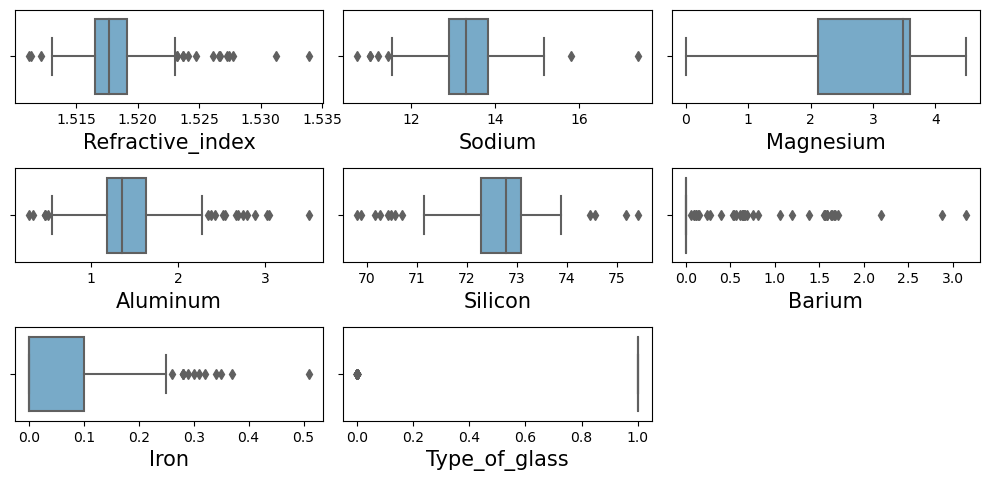

In [105]:
# Lets check for outliers using Boxplot
plt.figure(figsize=(10,6), facecolor='white')
plotnumber = 1
for col in df:
    if plotnumber <= 8:
        ax = plt.subplot(4,3, plotnumber)
        snb.boxplot(df[col], palette="Blues")
        plt.xlabel(col, fontsize=15)
        plt.yticks(rotation=180, fontsize=10)
    plotnumber += 1
plt.tight_layout()
plt.show()

Note: 1)Outliers for label cobulm will be ignored
    2)Barium and some other ones are having so much outliers and to avoid deleting too much out liers I will be checking 
    for quality features contributing to the lablel significatly

Barium is looking abnormal, I need further analysis to decide on what to do with it

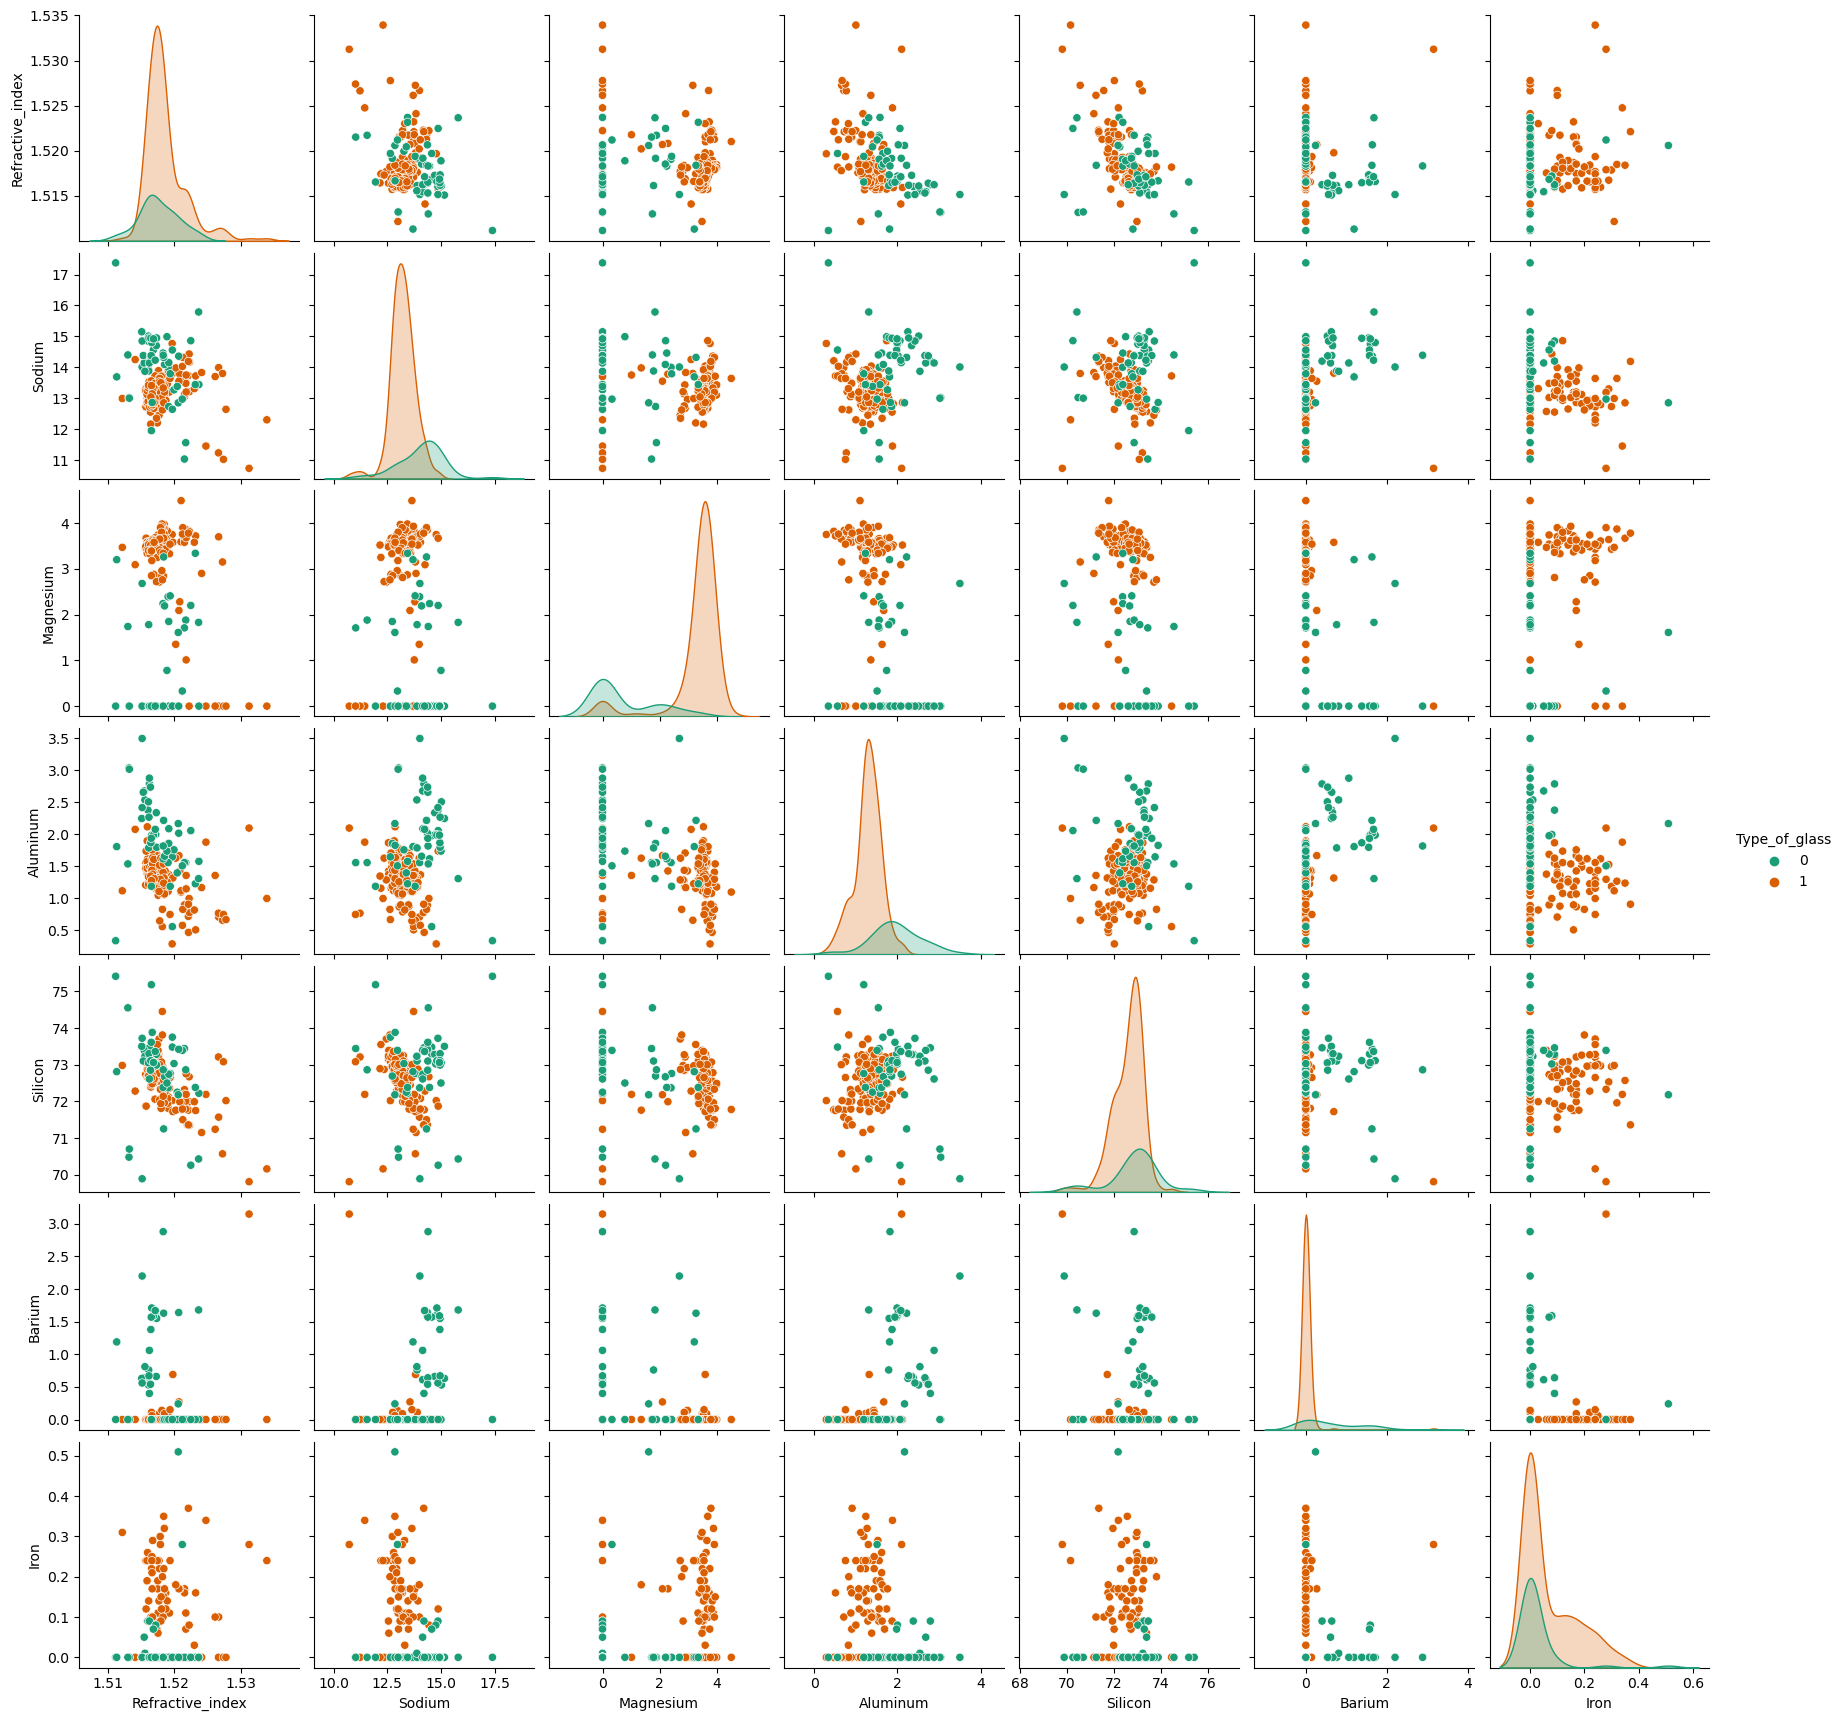

In [106]:
snb.pairplot(df,hue='Type_of_glass', palette='Dark2')
plt.show()

0.00    176
0.64      2
1.57      2
0.09      2
1.59      2
0.11      2
3.15      1
0.81      1
1.64      1
1.06      1
0.54      1
2.88      1
1.38      1
1.55      1
0.67      1
1.71      1
0.56      1
0.63      1
0.53      1
0.66      1
0.61      1
0.27      1
0.69      1
0.40      1
0.14      1
0.76      1
1.68      1
1.63      1
1.19      1
0.24      1
2.20      1
0.15      1
0.06      1
1.67      1
Name: Barium, dtype: int64


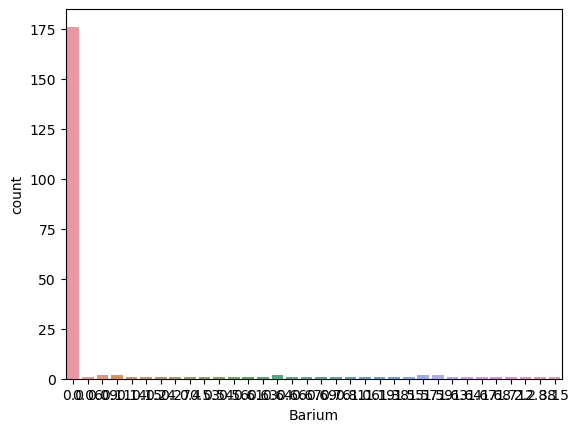

In [107]:
print(df['Barium'].value_counts())
ax = snb.countplot(x='Barium', data =df)

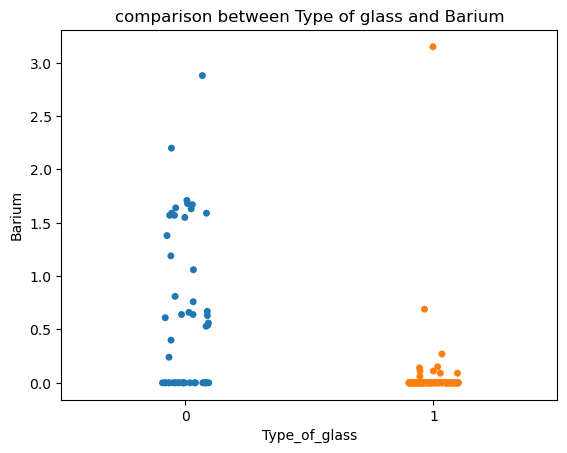

In [108]:
plt.title('comparison between Type of glass and Barium')
snb.stripplot(x='Type_of_glass', y = 'Barium', data =df)
plt.show()

There's is relationship but not much, due to availabilty of few data and has high f_score, I will keep it

In [109]:
#removing the outliers using zscore

from scipy.stats import zscore

out_features = x.drop('Magnesium', axis=1)
z=np.abs(zscore(out_features))

z

,Refractive_index,Sodium,Aluminum,Silicon,Potassium,Calcium,Barium,Iron
0,0.872868,0.284953,0.692442,1.127082,0.671705,0.145766,0.352877,0.586451
1,0.249333,0.591817,0.170460,0.102319,0.026213,0.793734,0.352877,0.586451
2,0.721318,0.149933,0.190912,0.438787,0.164533,0.828949,0.352877,0.586451
3,0.232831,0.242853,0.310994,0.052974,0.112107,0.519052,0.352877,0.586451
4,0.312045,0.169205,0.411375,0.555256,0.081369,0.624699,0.352877,0.586451
...,...,...,...,...,...,...,...,...
209,0.704815,0.898681,2.881125,0.052974,0.640968,0.157088,1.783978,0.586451
210,0.500178,1.856097,1.094342,0.529374,0.763919,0.392276,2.852405,0.586451
211,0.754046,1.168721,1.154570,0.995252,0.763919,0.364103,2.953200,0.586451
212,0.612399,1.193270,0.993960,1.241133,0.763919,0.335931,2.812087,0.586451


In [110]:
np.where(z>3)

(array([105, 106, 106, 106, 106, 106, 107, 107, 107, 110, 111, 112, 112,
        131, 145, 162, 163, 163, 163, 171, 171, 172, 172, 174, 184, 184,
        188, 189, 201, 201, 203, 207, 213]),
 array([5, 0, 1, 3, 5, 6, 0, 3, 5, 5, 5, 0, 5, 5, 7, 7, 2, 3, 6, 2, 4, 2,
        4, 7, 1, 3, 3, 6, 3, 4, 6, 6, 6]))

In [199]:
df2 = df[(z<3).all(axis=1)]

df2

,Refractive_index,Sodium,Magnesium,Aluminum,Silicon,Barium,Iron,Type_of_glass
0,1.52101,13.64,4.49,1.10,71.78,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.00,0.0,1
...,...,...,...,...,...,...,...,...
208,1.51640,14.37,0.00,2.74,72.85,0.54,0.0,0
209,1.51623,14.14,0.00,2.88,72.61,1.06,0.0,0
210,1.51685,14.92,0.00,1.99,73.06,1.59,0.0,0
211,1.52065,14.36,0.00,2.02,73.42,1.64,0.0,0


In [200]:
print('the shape of new data: ',df.shape[0])
print('the shape of old data: ',df2.shape[0])

the shape of new data:  214
the shape of old data:  194


data loss is not much

In [201]:
# data loss is relatively not much

print('percentage data loss after removing outliers using IQR ', ((df.shape[0] - df2.shape[0])/df.shape[0])* 100)

percentage data loss after removing outliers using IQR  9.345794392523365


In [202]:
# Checking for skewness

df2.skew()

Refractive_index    0.952733
Sodium              0.371482
Magnesium          -1.528849
Aluminum            0.658259
Silicon            -0.425450
Barium              3.188587
Iron                1.486479
Type_of_glass      -1.463837
dtype: float64

Magnesium,Aluminium,Barium,Iron are skewed, Label(Type_of_glass) will be ignored
I will fix it using Cuberoot

In [203]:
df2['Magnesium'] =np.sqrt(df2['Magnesium'])

df2.skew()

Refractive_index    0.952733
Sodium              0.371482
Magnesium          -1.798777
Aluminum            0.658259
Silicon            -0.425450
Barium              3.188587
Iron                1.486479
Type_of_glass      -1.463837
dtype: float64

Magnisium skewness got worse for evry method I used, I will leave it because it as strong relatioship with label

In [204]:
df2['Aluminum'] = np.cbrt(df2['Aluminum'])

df2.skew()

Refractive_index    0.952733
Sodium              0.371482
Magnesium          -1.798777
Aluminum           -0.374978
Silicon            -0.425450
Barium              3.188587
Iron                1.486479
Type_of_glass      -1.463837
dtype: float64

In [205]:
df2['Barium'] = np.cbrt(df2['Barium'])

df2.skew()

Refractive_index    0.952733
Sodium              0.371482
Magnesium          -1.798777
Aluminum           -0.374978
Silicon            -0.425450
Barium              2.207594
Iron                1.486479
Type_of_glass      -1.463837
dtype: float64

Barium skewness refuse to reduce band its not realy having strong relatioship with the Label, so I will drop it

In [207]:
df2['Iron'] = np.cbrt(df2['Iron'])
df2.skew()

Refractive_index    0.952733
Sodium              0.371482
Magnesium          -1.798777
Aluminum           -0.374978
Silicon            -0.425450
Barium              2.207594
Iron                0.883166
Type_of_glass      -1.463837
dtype: float64

Iron is slighly skewed and the contribution is low so I will drop it

In [208]:
df2.drop(['Barium','Iron'],axis=1,inplace=True)

df2

,Refractive_index,Sodium,Magnesium,Aluminum,Silicon,Type_of_glass
0,1.52101,13.64,2.118962,1.032280,71.78,1
1,1.51761,13.89,1.897367,1.107932,72.73,1
2,1.51618,13.53,1.884144,1.154800,72.99,1
3,1.51766,13.21,1.920937,1.088587,72.61,1
4,1.51742,13.27,1.902630,1.074337,73.08,1
...,...,...,...,...,...,...
208,1.51640,14.37,0.000000,1.399319,72.85,0
209,1.51623,14.14,0.000000,1.422757,72.61,0
210,1.51685,14.92,0.000000,1.257818,73.06,0
211,1.52065,14.36,0.000000,1.264107,73.42,0


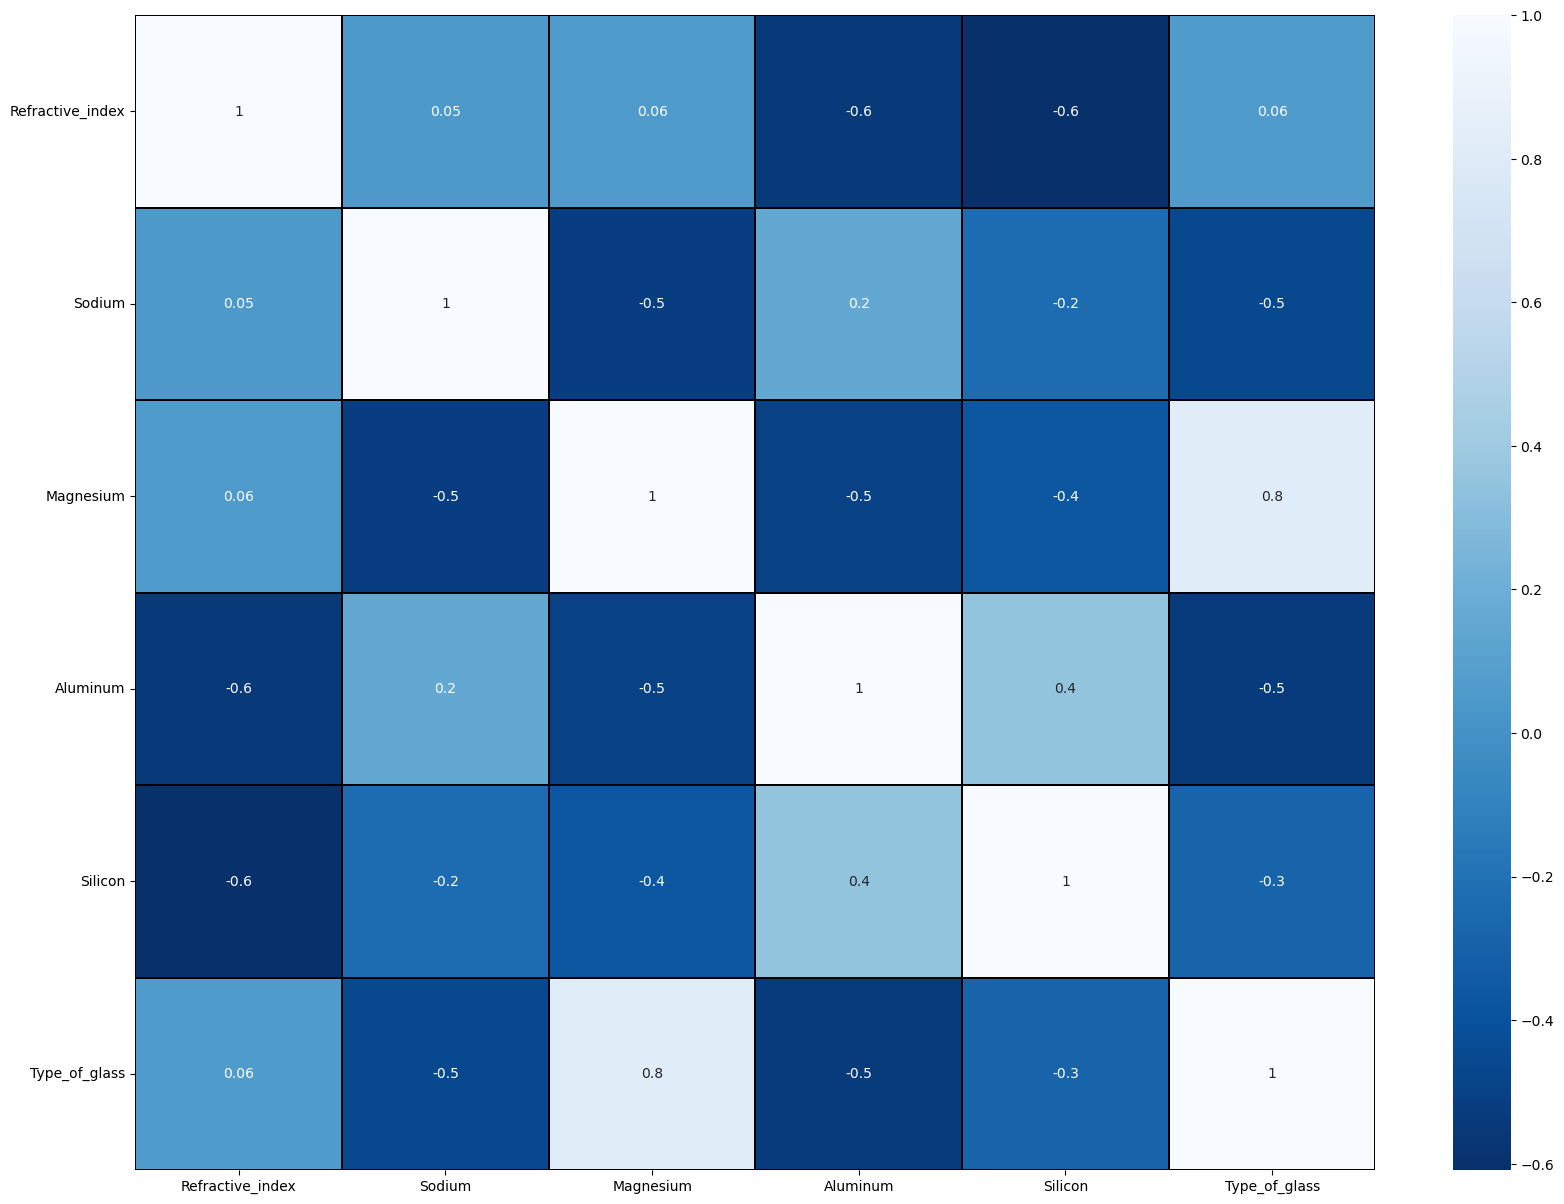

In [209]:
# Let check for multicolinearity

plt.figure(figsize=(20,15))
snb.heatmap(df2.corr(), linewidths=0.1, fmt='.1g', linecolor='black', cmap='Blues_r', annot= True)
plt.yticks(rotation = 0)
plt.show()


The heat map is not showing any strong colinearity among features

In [210]:
# Separate the label from features
x = df2.drop('Type_of_glass', axis=1)

y = df2['Type_of_glass']

In [211]:
# feature scaling using standard scalarization to avoid biasness

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x = pd.DataFrame(scaler.fit_transform(x), columns=x.columns)

x

,Refractive_index,Sodium,Magnesium,Aluminum,Silicon
0,1.291781,0.332127,0.837529,-0.666678,-1.612464
1,-0.197832,0.704398,0.505115,-0.035036,0.016082
2,-0.824346,0.168328,0.485280,0.356287,0.461790
3,-0.175926,-0.308179,0.540473,-0.196550,-0.189629
4,-0.281075,-0.218834,0.513010,-0.315529,0.616073
...,...,...,...,...,...
189,-0.727959,1.419158,-2.341115,2.397864,0.221793
190,-0.802440,1.076668,-2.341115,2.593556,-0.189629
191,-0.530805,2.238153,-2.341115,1.216416,0.581788
192,1.134057,1.404267,-2.341115,1.268927,1.198921


In [212]:
# Check for variance inflation factor to further check for multicolinearity

from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['VIF Values'] = [variance_inflation_factor(x.values, i) for i in range(len(x.columns))]

vif['Features'] = x.columns

vif

,VIF Values,Features
0,3.788832,Refractive_index
1,2.622395,Sodium
2,4.544341,Magnesium
3,2.730772,Aluminum
4,3.955409,Silicon


non is having a value higher than 5 which is the threshold

In [213]:
y.value_counts()

1    154
0     40
Name: Type_of_glass, dtype: int64

The Label is not balanced, I will balance it using SMOTE 

In [214]:
from imblearn.over_sampling import SMOTE
SM = SMOTE()

x,y = SM.fit_resample(x,y)

In [88]:
y.value_counts()

1    158
0    158
Name: Type_of_glass, dtype: int64

I can now build the model, I will build diferent models and select the best
Before I started building model I will select the best random state

In [215]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

maxAccu = 0
maxRS = 0

for i in range(1,200):
    x_train, x_test, y_train, y_test = train_test_split(x,y ,test_size =0.30, random_state=i)
    RFR = RandomForestClassifier()
    RFR.fit(x_train, y_train)
    pred = RFR.predict(x_test)
    acc = accuracy_score(y_test, pred)
    if acc > maxAccu:
        maxAccu = acc
        maxRS = i
print('Best accuracy is : ', maxAccu, ' at random state : ',maxRS)


Best accuracy is :  1.0  at random state :  8


In [217]:
#creating train test split

x_train, x_test, y_train, y_test = train_test_split(x,y ,test_size =0.30, random_state=maxRS)

In [218]:
# Classification Algorithm

from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_curve
from sklearn.model_selection import cross_val_score

#RandomForestClassifier
#checking accuracy for random forest classifier 

RFC = RandomForestClassifier()
RFC.fit(x_train, y_train)

predRFC = RFC.predict(x_test)
print(accuracy_score(y_test, predRFC))
print(confusion_matrix(y_test, predRFC))
print(classification_report(y_test, predRFC))

1.0
[[44  0]
 [ 0 49]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        44
           1       1.00      1.00      1.00        49

    accuracy                           1.00        93
   macro avg       1.00      1.00      1.00        93
weighted avg       1.00      1.00      1.00        93



In [223]:
#LogisticsRegression
#checking accuracy for LogisticsRegression  

LR = LogisticRegression()
LR.fit(x_train, y_train)

predLR = LR.predict(x_test)
print(accuracy_score(y_test, predLR))
print(confusion_matrix(y_test, predLR))
print(classification_report(y_test, predLR))

0.989247311827957
[[43  1]
 [ 0 49]]
              precision    recall  f1-score   support

           0       1.00      0.98      0.99        44
           1       0.98      1.00      0.99        49

    accuracy                           0.99        93
   macro avg       0.99      0.99      0.99        93
weighted avg       0.99      0.99      0.99        93



In [219]:
#AdaBoostClassifier
#checking accuracy for AdaboostClassifier 

AD = AdaBoostClassifier()
AD.fit(x_train, y_train)

predAD = AD.predict(x_test)
print(accuracy_score(y_test, predAD))
print(confusion_matrix(y_test, predAD))
print(classification_report(y_test, predAD))

0.989247311827957
[[43  1]
 [ 0 49]]
              precision    recall  f1-score   support

           0       1.00      0.98      0.99        44
           1       0.98      1.00      0.99        49

    accuracy                           0.99        93
   macro avg       0.99      0.99      0.99        93
weighted avg       0.99      0.99      0.99        93



In [220]:
#ExtraTreeClassifier
#checking accuracy for ExtraTreeClassifier 

ET = ExtraTreesClassifier()
ET.fit(x_train, y_train)

predET = ET.predict(x_test)
print(accuracy_score(y_test, predET))
print(confusion_matrix(y_test, predET))
print(classification_report(y_test, predET))

1.0
[[44  0]
 [ 0 49]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        44
           1       1.00      1.00      1.00        49

    accuracy                           1.00        93
   macro avg       1.00      1.00      1.00        93
weighted avg       1.00      1.00      1.00        93



In [221]:
# Validation accuracy score to be sure its not as a result of over fitting 

# Using Cross validation

from sklearn.model_selection import cross_val_score

score = cross_val_score(RFC,x,y)
print(score)
print(score.mean())
print('Difference between accuracy score and RandomForestClassifier is ', accuracy_score(y_test, predRFC) - score.mean())

[0.93548387 1.         0.98387097 0.8852459  0.93442623]
0.9478053939714437
Difference between accuracy score and RandomForestClassifier is  0.0521946060285563


In [224]:

score = cross_val_score(LR,x,y)
print(score)
print(score.mean())
print('Difference between accuracy score and LogisticsRegression is ', accuracy_score(y_test, predLR) - score.mean())

[0.90322581 1.         0.91935484 0.91803279 0.93442623]
0.9350079323109467
Difference between accuracy score and LogisticsRegression is  0.0542393795170103


In [225]:

score = cross_val_score(AD,x,y)
print(score)
print(score.mean())
print('Difference between accuracy score and AdaboostClassifier is ', accuracy_score(y_test, predAD) - score.mean())

[0.91935484 0.96774194 0.98387097 0.93442623 0.95081967]
0.9512427287149656
Difference between accuracy score and AdaboostClassifier is  0.038004583112991375


In [227]:
score = cross_val_score(ET,x,y)
print(score)
print(score.mean())
print('Difference between accuracy score and LogisticsRegression is ', accuracy_score(y_test, predET) - score.mean())

[0.98387097 1.         0.98387097 0.91803279 0.96721311]
0.9705975674246432
Difference between accuracy score and LogisticsRegression is  -0.4759739115106647


The best model to go for is AdaboostClassifier because it has the smallest difference.
I will save the model for reuse

In [230]:
# Saving the model
# Using .pkl

import joblib

joblib.dump(AD,'glassTypePridictor.pkl')

['glassTypePridictor.pkl']

In [232]:
model = joblib.load('glassTypePridictor.pkl')

prediction = model.predict(x_test)
prediction

array([1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       1, 0, 1, 0, 0])

In [233]:
a = np.array(y_test)
df = pd.DataFrame()

df['predicted'] = prediction
df['original'] = a

df

,predicted,original
0,1,1
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
88,1,1
89,0,0
90,1,1
91,0,0


In [234]:
print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        53
           1       1.00      1.00      1.00        40

    accuracy                           1.00        93
   macro avg       1.00      1.00      1.00        93
weighted avg       1.00      1.00      1.00        93

